In [117]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [6]:
# 1. 이미지 셋 읽어오기

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [13]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [18]:
train_images[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [19]:
train_images[0].shape # 이미지 1장은 28x28=784 픽셀

(28, 28)

In [22]:
train_labels[:5] # 이미지가 어떤 숫자인지

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [7]:
# 2. 이미지 전처리
# 1) 4차원으로 만들기 - 이미지 셋 자체는 3차원: 2차원 이미지 + 여러장
#                     - 이미지 픽셀마다의 특성(특징)을 추출하는 처리를 하기 위한 차원을 하나 더 추가
# 
# 2) 데이터를 읽어왔을 때 픽셀마다의 값의 명암 정도만 가지고 있음(0~255)
#    - 0~1 사이로 스케일링(표준화)시켜줌
#    - 방법) 255로 나누어주면 됨
# 
# 3) 이미지는 크기가 아주 다양함. 크기를 표준화

In [23]:
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))

In [25]:
train_images.shape

(60000, 28, 28, 1)

In [28]:
train_images, test_images = train_images/255.0, test_images/255.0

In [29]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [8]:
# 3. 특성 추출 처리

In [30]:
model=Sequential()

In [32]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
# sigmoid로도 바꿔서 해보기

In [10]:
# 4. 특성 추출한 결과를 학습 데이터로 넣어서 학습할 예정
#    deep modeling
#    1) 특성 추출한 이미지 데이터를 1차원으로 만들기 - Flatten()
#    2) 딥러닝 심층신경망 쌓기(deep MLP)
#    3) fit()

In [33]:
model.add(Flatten())# 입력층
model.add(Dense(64, activation='relu'))  # 은닉층
model.add(Dense(10, activation='softmax'))  # 출력층

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs=2, batch_size=100)

Epoch 1/2
600/600 [==============================] - 18s 29ms/step - loss: 0.2172 - accuracy: 0.9347
Epoch 2/2
600/600 [==============================] - 17s 29ms/step - loss: 0.0508 - accuracy: 0.9847


In [11]:
# 5. 모델에 대해 평가
#  1) test 데이터를 검증 => overfitting 여부 확인
#  2) 시각화로 평가

In [37]:
loss, acc=model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.0390 - accuracy: 0.9872 - 1s/epoch - 3ms/step


In [38]:
loss, acc

(0.038953687995672226, 0.9872000217437744)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [41]:
# 다중 분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred=model.predict(test_images)

In [42]:
y_pred[0]

array([1.6441827e-06, 7.2161856e-06, 1.2900885e-04, 1.9116695e-05,
       2.2744381e-08, 9.5249007e-08, 8.7026253e-09, 9.9982810e-01,
       9.5507985e-06, 5.2950450e-06], dtype=float32)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
y_pred_test=np.argmax(y_pred, axis=-1)

In [50]:
y_pred_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [49]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [51]:
print(accuracy_score(y_pred_test, test_labels))

0.9872


In [52]:
print(confusion_matrix(y_pred_test, test_labels))

[[ 972    0    1    0    0    1    4    0    4    5]
 [   2 1129    2    0    0    0    2    1    0    3]
 [   0    1 1018    1    0    0    0   10    1    0]
 [   0    0    1 1000    0    4    0    2    1    2]
 [   3    0    5    0  981    0    6    1    2   12]
 [   1    1    0    3    0  883    5    0    0    3]
 [   1    1    0    0    0    1  940    0    0    0]
 [   1    1    3    3    0    1    0 1009    1    5]
 [   0    2    2    3    0    2    1    2  963    2]
 [   0    0    0    0    1    0    0    3    2  977]]


In [55]:
df=pd.DataFrame(confusion_matrix(y_pred_test, test_labels))

In [56]:
df

,0,1,2,3,4,5,6,7,8,9
0,972,0,1,0,0,1,4,0,4,5
1,2,1129,2,0,0,0,2,1,0,3
2,0,1,1018,1,0,0,0,10,1,0
3,0,0,1,1000,0,4,0,2,1,2
4,3,0,5,0,981,0,6,1,2,12
5,1,1,0,3,0,883,5,0,0,3
6,1,1,0,0,0,1,940,0,0,0
7,1,1,3,3,0,1,0,1009,1,5
8,0,2,2,3,0,2,1,2,963,2
9,0,0,0,0,1,0,0,3,2,977


In [58]:
df.sum(axis=1)

0     987
1    1139
2    1031
3    1010
4    1010
5     896
6     943
7    1024
8     977
9     983
dtype: int64

In [60]:
df.sum(axis=1)[0]

987

In [59]:
df.iloc[0,0]

972

In [105]:
# 각 숫자의 적중률 리스트
score_list=[]
for i in range(10):
    score_list.append(round((df.iloc[i,i]/df.sum(axis=1)[i])*100, 2))

In [101]:
round(score_list[1], 4)

99.122

In [106]:
score_list

[98.48, 99.12, 98.74, 99.01, 97.13, 98.55, 99.68, 98.54, 98.57, 99.39]

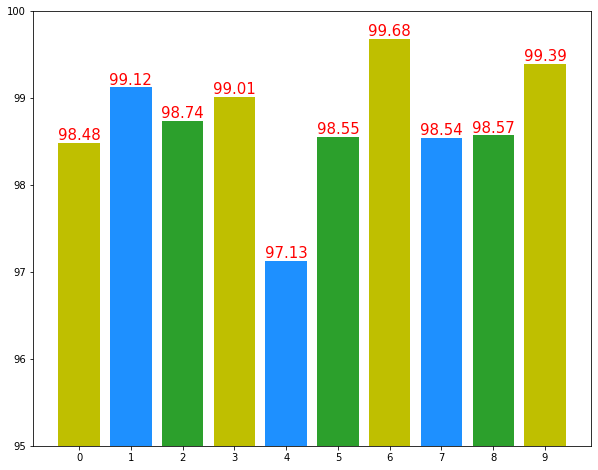

In [116]:
plt.figure(figsize=(10,8))
x = ['0','1','2','3','4','5','6','7','8','9']
number = np.arange(10)
values = score_list
colors = ['y', 'dodgerblue', 'C2']

plt.bar(x, values, color=colors)
plt.xticks(x, number)
plt.ylim([95, 100])

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

In [ ]:
# 적중률 시각화